Load some libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Provide input paths to data files (might need to be changed)

In [54]:
data_hosts_path = '../kaggle/input/olympic-games-medals-19862018/olympic_hosts.csv'
data_medals_path = '../kaggle/input/olympic-games-medals-19862018/olympic_medals.csv'
data_results_path = '../kaggle/input/olympic-games-medals-19862018/olympic_results.csv'
data_athletes_path = '../kaggle/input/olympic-games-medals-19862018/olympic_athletes.csv'

Load the hosts dataset (general data about each olympics game)

In [55]:
df_hosts = pd.read_csv(data_hosts_path)
df_hosts.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


Load the medals dataset (who won what medals, and in what olympics)

In [56]:
df_medals = pd.read_csv(data_medals_path)
df_medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


Let's merge medals and hosts data to see how data can be merged

In [57]:
data = df_medals.merge(df_hosts, how='left', left_on='slug_game', right_on='game_slug')
data['athlete_full_name'] = data['athlete_full_name'].str.title()
data.drop(['slug_game', 'game_slug', 'game_name', 'game_end_date', 'game_start_date'], inplace=True, axis=1)
data.head()

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_season,game_year
0,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania Constantini,Italy,IT,ITA,China,Winter,2022
1,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos Mosaner,Italy,IT,ITA,China,Winter,2022
2,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin Skaslien,Norway,NO,NOR,China,Winter,2022
3,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus Nedregotten,Norway,NO,NOR,China,Winter,2022
4,Curling,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida De Val,Sweden,SE,SWE,China,Winter,2022


Medals for Athletics

In [58]:
data_athlete = data[data['participant_type']=='Athlete']
data_team = data[data['participant_type']=='GameTeam']
data_team_a = data_team[data_team['athlete_full_name'].isna()]
group_columns = ['discipline_title', 'event_title', 'event_gender', 'medal_type', 'participant_type', 'participant_title',
                 'country_name', 'country_3_letter_code', 'game_location', 'game_season', 'game_year']
agg_columns = ['country_code', 'athlete_full_name']
data_team_b = data_team[data_team['athlete_full_name'].notna()].groupby(group_columns)[agg_columns].agg(lambda x: set(x)).reset_index()
data_medal = pd.concat([data_team_a, data_team_b, data_athlete], axis=0).reset_index(drop=True)
data_medal

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_season,game_year
0,Curling,Women,Women,GOLD,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,China,Winter,2022
1,Curling,Women,Women,SILVER,GameTeam,Japan,NaN,NaN,Japan,JP,JPN,China,Winter,2022
2,Curling,Women,Women,BRONZE,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Winter,2022
3,Curling,Men,Men,GOLD,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Winter,2022
4,Curling,Men,Men,SILVER,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,China,Winter,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20212,Weightlifting,heavyweight - one hand lift men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/viggo-jensen,Viggo Jensen,Denmark,DK,DEN,Greece,Summer,1896
20213,Weightlifting,heavyweight - one hand lift men,Men,BRONZE,Athlete,NaN,NaN,Alexandros Nikolopoulos,Greece,GR,GRE,Greece,Summer,1896
20214,Weightlifting,heavyweight - two hand lift men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/viggo-jensen,Viggo Jensen,Denmark,DK,DEN,Greece,Summer,1896
20215,Weightlifting,heavyweight - two hand lift men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/launceston-el...,Launceston Elliot,Great Britain,GB,GBR,Greece,Summer,1896


In [59]:
data_summer = data_medal[data_medal['game_season']=='Summer'].reset_index(drop=True)

In [60]:
def sort_games_name(game_name_list):
    '''
    Input: ['Sydney 2000', 'Atlanta 1996', 'Beijing 2008', 'Athens 2004']
    Output: ['Atlanta 1996', 'Sydney 2000', 'Athens 2004', 'Beijing 2008'
    '''
    game_name_tuple_split = [(' '.join(i.split(' ')[:-1]), i.split(' ')[-1])  for i in game_name_list]
    game_name_tuple_sorted = sorted(game_name_tuple_split, key=lambda x: x[1])
    game_name_list_sorted = [' '.join(i) for i in game_name_tuple_sorted]
    return game_name_list_sorted

In [61]:
def get_country_medal(data, country):
    data_country = data[data['country_name']==country]
    data_medal = data_country.groupby(['game_name', 'discipline_title'])['participant_type']\
                             .count().reset_index()
    data_medal = data_medal.pivot('discipline_title', 'game_name', 'participant_type')
    data_medal = data_medal[sort_games_name(list(data_medal.columns))]
    if len(list(data_medal.columns))<10:
        data_medal.columns = [col.replace(' ', '\n') for col in data_medal.columns]
    else:
        data_medal.columns = [col.split(' ')[-1] for col in data_medal.columns]
    data_medal['Total'] = data_medal.sum(axis=1)
    data_medal.loc["Total"] = data_medal.sum()
    return data_medal

In [62]:
data_summer.drop('game_season', axis=1, inplace=True)
data_summer.head()

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_year
0,Canoe Sprint,Men's Kayak Four 500m,Men,GOLD,GameTeam,Germany,NaN,NaN,Germany,DE,GER,Japan,2020
1,Canoe Sprint,Men's Kayak Four 500m,Men,SILVER,GameTeam,Spain,NaN,NaN,Spain,ES,ESP,Japan,2020
2,Canoe Sprint,Men's Kayak Four 500m,Men,BRONZE,GameTeam,Slovakia,NaN,NaN,Slovakia,SK,SVK,Japan,2020
3,Canoe Sprint,Women's Kayak Four 500m,Women,GOLD,GameTeam,Hungary,NaN,NaN,Hungary,HU,HUN,Japan,2020
4,Canoe Sprint,Women's Kayak Four 500m,Women,SILVER,GameTeam,Belarus,NaN,NaN,Belarus,BY,BLR,Japan,2020


Only gold medals

In [63]:
data_summer_gold = data_summer[data_summer['medal_type'] == 'GOLD']
data_summer_gold.head()

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_year
0,Canoe Sprint,Men's Kayak Four 500m,Men,GOLD,GameTeam,Germany,NaN,NaN,Germany,DE,GER,Japan,2020
3,Canoe Sprint,Women's Kayak Four 500m,Women,GOLD,GameTeam,Hungary,NaN,NaN,Hungary,HU,HUN,Japan,2020
6,Football,Women,Women,GOLD,GameTeam,Canada,NaN,NaN,Canada,CA,CAN,Japan,2020
9,Football,Men,Men,GOLD,GameTeam,Brazil,NaN,NaN,Brazil,BR,BRA,Japan,2020
12,Artistic Swimming,Team,Women,GOLD,GameTeam,ROC,NaN,NaN,ROC,ROC,ROC,Japan,2020


Drop countries that don't exist

In [ ]:
# TODO

In [64]:
data_summer_gold_men = data_summer_gold[data_summer_gold['event_gender'] == 'Men']
data_summer_gold_women = data_summer_gold[data_summer_gold['event_gender'] == 'Women']

country_gold_men = data_summer_gold_men.groupby(['country_name'])['participant_type'].count().reset_index().rename(columns={'participant_type':'total_medals'})
country_gold_men.sort_values('total_medals', ascending=False).head()

,country_name,total_medals
96,United States of America,738
82,Soviet Union,282
37,Great Britain,196
48,Italy,177
33,France,162


In [65]:
country_gold_women = data_summer_gold_women.groupby(['country_name'])['participant_type'].count().reset_index().rename(columns={'participant_type':'total_medals'})
country_gold_women.sort_values('total_medals', ascending=False).head()

,country_name,total_medals
79,United States of America,288
54,People's Republic of China,143
68,Soviet Union,95
31,German Democratic Republic (Germany),79
3,Australia,70


In [118]:
country_gold_total = data_summer_gold.groupby(['country_name', 'discipline_title', 'event_gender', 'game_year'])['participant_type'].count().reset_index().rename(columns={'participant_type':'total_medals'})

country_gold_total = country_gold_total.sort_values('game_year', ascending=True)

athletics_women = country_gold_total[(country_gold_total['discipline_title'] == 'Athletics') & (country_gold_total['event_gender'] == 'Women')]
athletics_women = athletics_women.drop(['discipline_title', 'event_gender'], axis=1)
athletics_women.head()

,country_name,game_year,total_medals
2887,United States of America,1928,1
892,Germany,1928,1
2095,Poland,1928,1
299,Canada,1928,2
2888,United States of America,1932,5


In [67]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://en.wikipedia.org/wiki/2024_Summer_Olympics"       # URL of the Wikipedia page of olympic games 2024

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

participating_countries_section = soup.find(id="Participating_National_Olympic_Committees")
countries = []
if participating_countries_section:
    ul = participating_countries_section.find_next('ul')
    if ul:
        li_tags = ul.find_all('li')
        for li in li_tags:
            country = li.text.split('(')[0].strip()
            countries.append(country)

df = pd.DataFrame(countries, columns=["Country"])
df.head()

,Country
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra


See the difference between which countries will participate and which ones won't

In [68]:
# TODO: do something with this info
countires_2024 = set(df['Country'])
countries_before = set(country_gold_total['country_name'])

print('before - 2024', countries_before - countires_2024)
print('2024 - before', countires_2024 - countries_before)

before - 2024 {'German Democratic Republic (Germany)', "People's Republic of China", 'MIX', "Democratic People's Republic of Korea", 'Soviet Union', 'ROC', 'United States of America', 'Czechoslovakia', 'Islamic Republic of Iran', 'Hong Kong, China', 'Russian Federation', 'Federal Republic of Germany', 'Belarus', 'Yugoslavia', 'Australasia', 'Unified Team', 'Syrian Arab Republic', 'Republic of Korea', 'Independent Olympic Athletes', "Côte d'Ivoire", 'Serbia and Montenegro'}
2024 - before {'Turkmenistan', 'Guyana', 'Malawi', 'Botswana', 'Maldives', 'Eritrea', 'Moldova', 'Sudan', 'Haiti', 'Afghanistan', 'Iraq', 'Tuvalu', 'Kuwait', 'Angola', 'British Virgin Islands', 'Namibia', 'Refugee Olympic Team', 'Dominica', 'Cyprus', 'Belize', 'Syria', 'Kyrgyzstan', 'Ivory Coast', 'Malta', 'Equatorial Guinea', 'Nicaragua', 'Hong Kong', 'Federated States of Micronesia', 'Guam', 'North Macedonia', 'Cayman Islands', 'Solomon Islands', 'Saudi Arabia', 'Chad', 'Marshall Islands', 'Paraguay', 'Saint Vincen

In [119]:
from collections import defaultdict
from sklearn.linear_model import LinearRegression

medal_preds = {}

countries = set(athletics_women['country_name'])
for country in countries:
    athletics_women_country = athletics_women[athletics_women['country_name'] == country]
    athletics_women_country = athletics_women_country.drop(['country_name'], axis=1).reset_index(drop=True)
    athletics_women_country['normalized_year'] = (athletics_women_country['game_year'] - athletics_women_country['game_year'].min()) / 4
    model = LinearRegression()
    X = athletics_women_country[['normalized_year']]
    y = athletics_women_country['total_medals']
    model.fit(X,y)
    next_year_norm = 24.0
    predicted_medals = np.round(model.predict(np.array([[next_year_norm]])))
    medal_preds[country] = predicted_medals[0]

print(medal_preds)


/home/beimukvo/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/beimukvo/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/beimukvo/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/beimukvo/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/beimukvo/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/beimukvo/.local/lib/python3.10/site-packages

{'German Democratic Republic (Germany)': 7.0, "People's Republic of China": 3.0, 'Uganda': 1.0, 'Japan': 1.0, 'Finland': 1.0, 'Norway': 1.0, 'Algeria': 1.0, 'Colombia': 1.0, 'Croatia': 25.0, 'Greece': 1.0, 'Great Britain': 1.0, 'Soviet Union': 10.0, 'Romania': 1.0, 'Cameroon': 1.0, 'Spain': 1.0, 'Brazil': 1.0, 'ROC': 1.0, 'Kazakhstan': 1.0, 'United States of America': 5.0, 'Tunisia': 1.0, 'Morocco': 1.0, 'Czechoslovakia': 1.0, 'Kenya': 4.0, 'Hungary': 1.0, 'Ethiopia': 5.0, 'Federal Republic of Germany': 2.0, 'Russian Federation': 5.0, 'Belarus': -22.0, 'South Africa': 1.0, 'Netherlands': 0.0, 'Australia': -1.0, 'Bahrain': 1.0, 'Unified Team': 4.0, 'Puerto Rico': 1.0, 'Syrian Arab Republic': 1.0, 'Poland': 1.0, 'Bahamas': -2.0, 'Mozambique': 1.0, 'Nigeria': 1.0, 'New Zealand': 1.0, 'Canada': 2.0, 'Sweden': 1.0, 'Italy': 1.0, 'Jamaica': 6.0, 'Belgium': -7.0, 'Ukraine': 1.0, 'Czech Republic': 1.0, 'Cuba': 3.0, 'France': 1.0, 'Portugal': 1.0, 'Germany': 2.0, 'Venezuela': 1.0, 'Austria': 1.

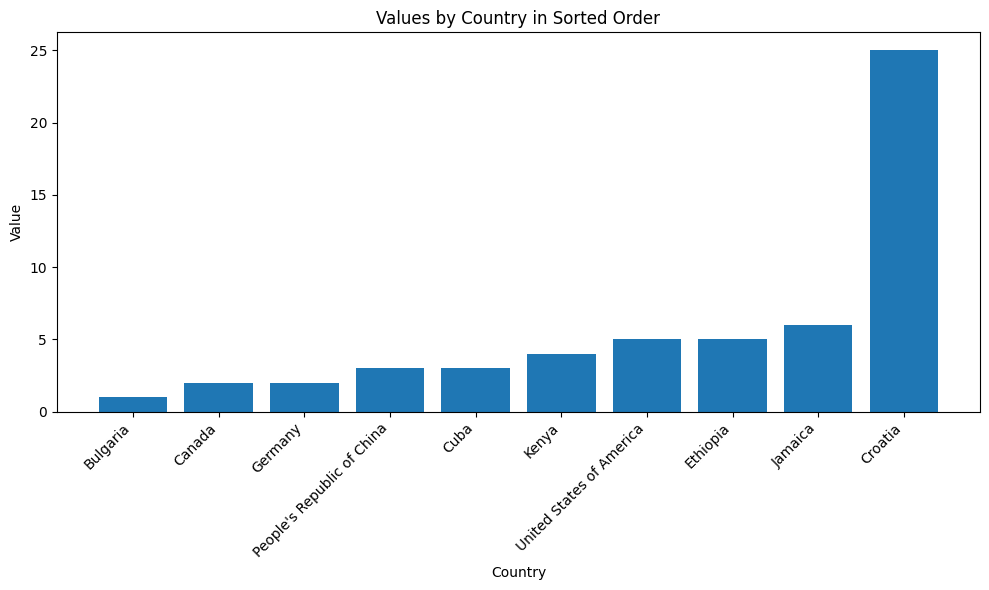

In [136]:
medal_preds
filtered_data = {k: v for k, v in medal_preds.items() if k not in ['Soviet Union', 'German Democratic Republic (Germany)', 'Russian Federation', 'Unified Team', 'Federal Republic of Germany']}
sorted_data = dict(sorted(filtered_data.items(), key=lambda item: item[1]))
sorted_data = dict(list(sorted_data.items())[-10:])

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_data.keys(), sorted_data.values())
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Values by Country in Sorted Order')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

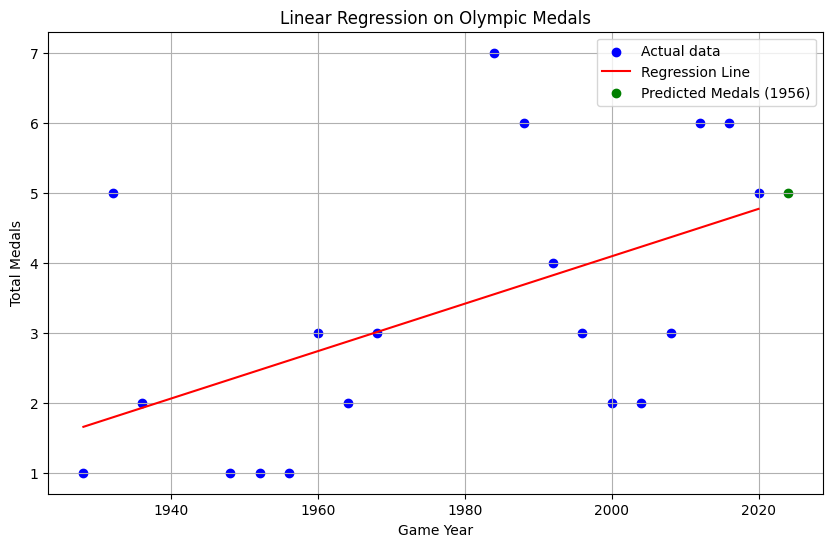

In [113]:
plt.figure(figsize=(10, 6))
plt.scatter(athletics_women_us['game_year'], athletics_women_us['total_medals'], color='blue', label='Actual data')
plt.plot(athletics_women_us['game_year'], model.predict(X), color='red', label='Regression Line')
plt.scatter(next_year, predicted_medals, color='green', label='Predicted Medals (1956)')
plt.xlabel('Game Year')
plt.ylabel('Total Medals')
plt.title('Linear Regression on Olympic Medals')
plt.legend()
plt.grid(True)
plt.show()